# Prosper Loan Data Exploration
## by Angie Koepcke



### Preliminary Wrangling

> The Prosper Loan data set contains loan data for various types of loans from 2005 to 2014. The data file was provided by Udacity.  The loans ranged in term from 12 to 60 months.

> The first step I completed was to upload the 'prosperLoanData.csv' file to my project folder in my jupyter notebook.  This way I could run .head() and .info() on the data and get an idea of what I was looking at.  I opened the Prosper Loan Data variable definitions in Google sheets.

> I also check to make sure all the packages I needed for this project were installed.  It turned out I had to install Seaborn, so I did this in Linux. After installing Seaborn, I checked the data using .head() and .info(). 

> There were 80 columns and 113,937 rows of data in the loan data file.  I had to decide which variables I wanted to explore.  The loan listing category, which classifies what the loan was for, and the state interested me right away.  Beyond that, I decided I needed to do more exploration and make some decisions. 

> I chose to look at loans by state, occupation, and reason for the loan.  

## Table of Contents   

### Univariate Exploration
    

   * [Introduction - Dataset Structures and Features](#Introduction) <a Introduction ="Introduction"></a>       
   
   * [Graph 1 - Loans by State Histogram](#Graph-1) <a Graph-1 ="Graph-1"> </a>
   
   * [Graph 2 - Loans by Category Bar Chart](#Graph-2) <a Graph-2 ="Graph-2"> </a>
   
   * [Graph-3 - Loans by Status Histogram](#Graph-3) <a Graph-3 ="Graph-3"> </a>
   
### Bivariate Exploration
   
   * [Graph-4 - Loans per Year Histogram](#Graph-4) <a Graph-4 ="Graph-4"> </a>
   
   * [Graph-5 - Defaulted Loans per Year Histogram](#Graph-5) <a Graph-5 ="Graph-5"> </a>
   
   * [Graph-6 -Top 10 Occupations Defaulted Loans Histogram](#Graph-6) <a Graph-6 ="Graph-6"> </a>
   
   * [Graph-7 - Top 10 Loan Categories Defaulted Loans Histogram](#Graph-7) <a Graph-7 ="Graph-7"> </a>
   
   * [Graph-8 - Defaulted Loans by State Histogram](#Graph-8) <a Graph-8 ="Graph-8"> </a>
   

In [168]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [169]:
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Introduction



### What is the structure of your dataset?

> This dataset is a .csv file (comma separated values) with eighty columns and approximately 113,937 rows.  Right away I could see there were columns in formats which might not be ideal for analysis, such as ListingCreationDate. This column is an object in the original data.  I would change it to a datetime format for analysis, as well as all other date / time columns, so I could look at changes across time periods.

### What is/are the main feature(s) of interest in your dataset?

> There are 80 different columns of variables for this loan data.  Some of the data is related to the borrower such as occupation, employment status and duration, public records, and credit scores.  Some of the data is analysis internally completed by Prosper, such as Prosper ratings, estimated yield, estimates for loss and return.  Some of the data is related to the status of the loan.  The data could be separated into smaller tables containing like information.  A table containing only variables relevant to the analysis plan could be made.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am interested in what the loans were for, and what states the loans were made in.  Further I'd like to look at occupations and interest rates.  Finally, I'd like to see what happened to loans.  Did certain states or occupations have similar features related to repayment or default?

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [171]:
# I want to make sure the loan listings are unique
df['ListingKey'].nunique()

113066

In [172]:
# I only want to analyze unique loans, so lets look at the duplicates
df_key_dups = df[df['ListingKey'].duplicated()==True]
df_key_dups.count()

ListingKey                     871
ListingNumber                  871
ListingCreationDate            871
CreditGrade                      0
Term                           871
                              ... 
PercentFunded                  871
Recommendations                871
InvestmentFromFriendsCount     871
InvestmentFromFriendsAmount    871
Investors                      871
Length: 81, dtype: int64

In [173]:
# I'm going to make a copy of the dataframe and drop the duplicates
df_new = df.copy()
##df_new.info()

In [174]:
#Drop the duplicates in 'ListingKey' and then check the row totals
df_new.drop_duplicates(subset=['ListingNumber'], keep=False, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           112239 non-null  object 
 1   ListingNumber                        112239 non-null  int64  
 2   ListingCreationDate                  112239 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 112239 non-null  int64  
 5   LoanStatus                           112239 non-null  object 
 6   ClosedDate                           55063 non-null   object 
 7   BorrowerAPR                          112214 non-null  float64
 8   BorrowerRate                         112239 non-null  float64
 9   LenderYield                          112239 non-null  float64
 10  EstimatedEffectiveYield              83155 non-null   float64
 11  EstimatedLoss

In [175]:
# import the pandas datetimefunction
import datetime
# Change the date columns to date time format
df_new['DateCreditPulled']=pd.to_datetime(df_new['DateCreditPulled'])
df_new['ListingCreationDate']=pd.to_datetime(df_new['ListingCreationDate'])
df_new['LoanOriginationDate']=pd.to_datetime(df_new['LoanOriginationDate'])
df_new['ClosedDate']=pd.to_datetime(df_new['ClosedDate'])

In [176]:
# Get the start and end dates for the loan listing creation data
df_new['ListingCreationDate'].min(),df_new['ListingCreationDate'].max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [177]:
# Get the start and end dates for the loan origination data
df_new['LoanOriginationDate'].min(),df_new['LoanOriginationDate'].max()

(Timestamp('2005-11-15 00:00:00'), Timestamp('2014-03-12 00:00:00'))

In [178]:
# Get the start and end dates for the loan closed date
df_new['ClosedDate'].min(),df_new['ClosedDate'].max()

(Timestamp('2005-11-25 00:00:00'), Timestamp('2014-03-10 00:00:00'))

In [179]:
# I used groupby to look at the loan listings per state
state_df = df.groupby("BorrowerState")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
state_df

,BorrowerState,count
4,CA,14717
43,TX,6842
34,NY,6729
9,FL,6720
14,IL,5921
10,GA,5008
35,OH,4197
22,MI,3593
45,VA,3278
31,NJ,3097


> The loans by state analysis is sorted in descending order, showing California had the most amount of loans, and North Dakota had the fewest.  States could be divided into regions for analysis.

In [180]:

# Checking to see that all 'ListingKey' values are unique
df_new['ListingKey'].nunique()

112239

In [181]:
# Let's see what the average loan length is
df_new['Term'].mean()

40.77203111218026

In [182]:
# Let's get the min and max loan lengths
df_new['Term'].min(), df_new['Term'].max()

(12, 60)

In [183]:
# Add a copy of the new csv file to the project
# df_new.to_csv('New-Prospect-DF.csv')

## Graph-1

[Loans by State Histogram ](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

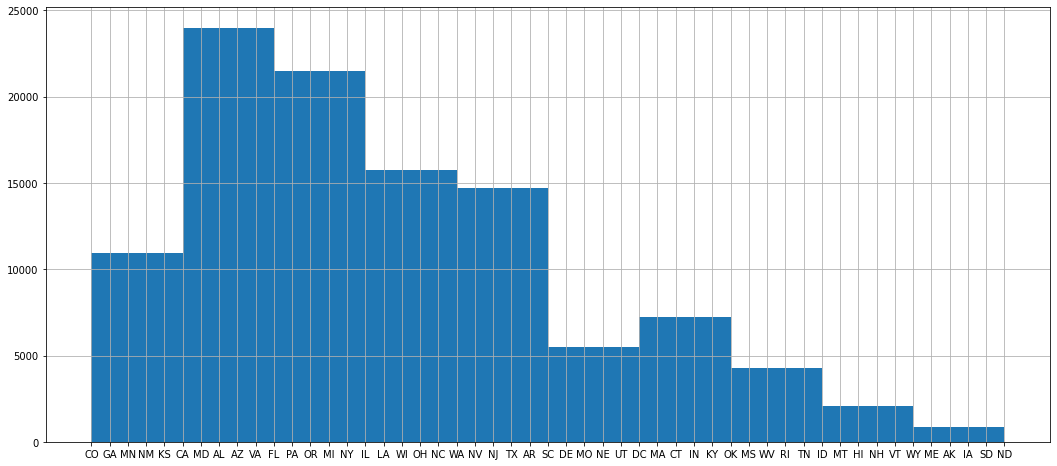

In [184]:
# I made a histogram to see which states had the most loans and which had the least amount of loans
df_new['BorrowerState'].hist(figsize=(18,8))

### State Histogram
> The histogram shows the five states with the most amount of loans are California, Maryland, Alabama, Arizona and Virgina.  The five states with the least amount of loans are Maine, Alaska, Iowa, South Dakota and North Dakota.  The number of loans per state could be analyzed by geographic region instead of state, however, I am interested in occupation so I don't want to analyze by geographic region at this time.

In [185]:
# The occupations and number of loans associated with each occupation #https://stackoverflow.com/questions/40454030/count-and-sort-with-pandas
occupation_df = df.groupby("Occupation")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False).head(10)
occupation_df

,Occupation,count
35,Other,28617
41,Professional,13628
12,Computer Programmer,4478
19,Executive,4311
59,Teacher,3759
1,Administrative Assistant,3688
2,Analyst,3602
47,Sales - Commission,3446
0,Accountant/CPA,3233
11,Clerical,3164


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [186]:
# I wanted to see which borrowers states and occupations had the greatest amounts delinquent. I didn't see any obvious correlations here.
df_delinquent = df_new[df_new['AmountDelinquent'] >0].groupby(['BorrowerState','Occupation'], as_index=False)['AmountDelinquent'].mean().sort_values(by='AmountDelinquent',ascending=False).head(10)
df_delinquent

,BorrowerState,Occupation,AmountDelinquent
297,DE,Nurse (RN),166266.500000
1099,NJ,Tradesman - Carpenter,165097.000000
152,CA,Investor,132306.000000
1384,RI,Pharmacist,131303.833333
1065,NJ,Bus Driver,113205.000000
290,DE,Bus Driver,106156.000000
1102,NJ,Tradesman - Plumber,103709.000000
681,MA,Food Service,91984.500000
23,AL,Doctor,87795.000000
1054,NH,Professor,84933.000000


In [187]:
# I noticed there was a column for whether or not the person had verifiable income. 
# I was surprised to see Prosper gave loans to people who didn't have verifiable income
df_new.query('IncomeVerifiable == False').count()

ListingKey                     8508
ListingNumber                  8508
ListingCreationDate            8508
CreditGrade                    1325
Term                           8508
                               ... 
PercentFunded                  8508
Recommendations                8508
InvestmentFromFriendsCount     8508
InvestmentFromFriendsAmount    8508
Investors                      8508
Length: 81, dtype: int64

In [188]:
# Let's look at the Listing Category data
df_new['ListingCategory (numeric)'].describe()

count    112239.000000
mean          2.779159
std           3.999273
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: ListingCategory (numeric), dtype: float64

In [189]:
# I'm going to rename this column Listing Category because it uses parentheses
df_new.rename(columns = {'ListingCategory (numeric)': 'Listing_Category'}, inplace = True)

In [190]:
# Check the renaming code
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           112239 non-null  object        
 1   ListingNumber                        112239 non-null  int64         
 2   ListingCreationDate                  112239 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 112239 non-null  int64         
 5   LoanStatus                           112239 non-null  object        
 6   ClosedDate                           55063 non-null   datetime64[ns]
 7   BorrowerAPR                          112214 non-null  float64       
 8   BorrowerRate                         112239 non-null  float64       
 9   LenderYield                          112239 non-null  float64       
 

In [191]:
df_new['Listing_Category'].value_counts()

1     56977
0     16965
7     10403
2      7345
3      7127
6      2564
4      2395
13     1978
15     1493
18      879
14      851
19      760
5       756
20      753
16      304
11      211
8       193
10       91
9        85
12       57
17       52
Name: Listing_Category, dtype: int64

## Graph-2

[Loans by Category Bar Chart](#Introduction) <a Introduction ="Introduction"> </a>

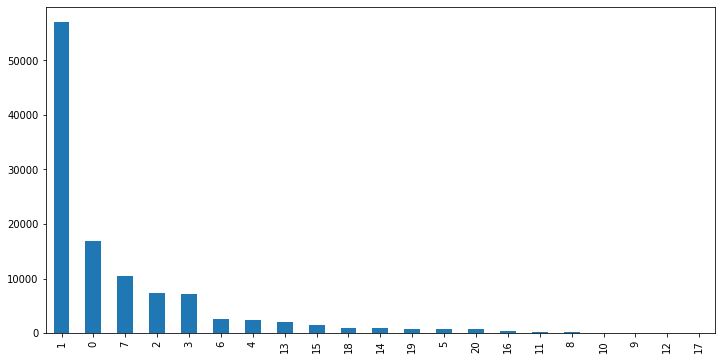

In [192]:
# A bar chart of the loan listing category to see which loan type was most popular
df_new['Listing_Category'].value_counts().plot(kind='bar',figsize=(12,6));

### Listing Category Bar Chart
> The category '1 - Debt Consolidation' was the most common reason sought a loan.

>Listing Category Key: 
> 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [193]:
# Let's look at the value counts for the loan status
df_new['LoanStatus'].value_counts()

Current                   54928
Completed                 38048
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        794
Past Due (31-60 days)       359
Past Due (61-90 days)       309
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [194]:
# Total completed and current loans
df_new['ListingKey'][df_new['LoanStatus'] == 'Current'].count()+df_new['ListingKey'][df_new['LoanStatus'] == 'Completed'].count()

92976

In [195]:
# Total amount of non-duplicated loans
df_new['LoanStatus'].count()

112239

In [196]:
# Percentage of loans complete or current
(df_new['ListingKey'][df_new['LoanStatus'] == 'Current'].count()+df_new['ListingKey'][df_new['LoanStatus'] == 'Completed'].count())/df_new['LoanStatus'].count()

0.8283751637131478

In [197]:
# Percentage of total loans which are current
df_new['ListingKey'][df_new['LoanStatus'] == 'Current'].count()/df_new['LoanStatus'].count()

0.4893842603729541

In [198]:
# Number of current loans
df_new['ListingKey'][df_new['LoanStatus'] == 'Current'].count()

54928

In [199]:
# Number of loans still in process
active_loans = df_new['LoanStatus'].count()-df_new['ListingKey'][df_new['LoanStatus'] == 'Completed'].count()-df_new['ListingKey'][df_new['LoanStatus'] == 'Chargedoff'].count()-df_new['ListingKey'][df_new['LoanStatus'] == 'Defaulted'].count()-df_new['ListingKey'][df_new['LoanStatus'] == 'Cancelled'].count()
active_loans

57176

In [200]:
# Number of loans defaulted, charged-off, or cancelled
dead_loans = df_new['ListingKey'][df_new['LoanStatus'] == 'Chargedoff'].count()+df_new['ListingKey'][df_new['LoanStatus'] == 'Defaulted'].count()+df_new['ListingKey'][df_new['LoanStatus'] == 'Cancelled'].count()
dead_loans

17015

In [201]:
# Percentage of dead loans compared to the total number of loans
dead_loans / df_new['LoanStatus'].count()

0.1515961475066599

## Graph-3

[Loan Status Histogram](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

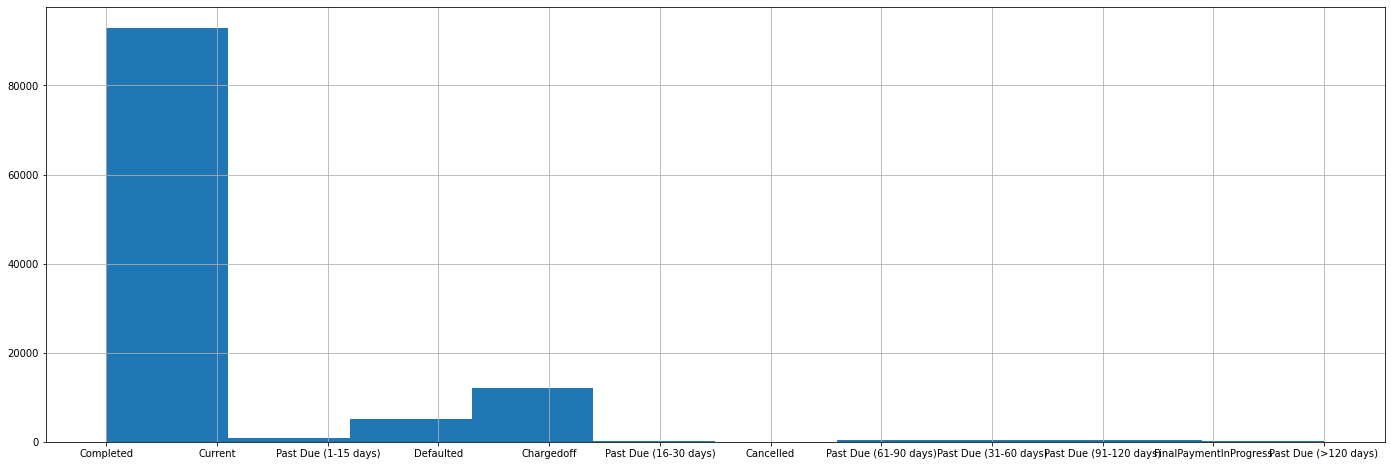

In [202]:

# Histogram of the loan status
df_new['LoanStatus'].hist(figsize=(24,8))

### Histogram of the loan status

> The histogram shows the majority of the total loans were completed or current.  Analysis could be done based on past, 'Defaulted', 'Chargedoff','Cancelled', or 'Past Due...' data to predict the probability of default for current loans.  At the time of this data collection by Prosper, there was a potential for 57,176 loans to go into default and about 15% of the total number of loans given by Prosper were either charge-offs, defaulted ot cancelled. Analyzing the default probability of the loans at periodic intervals woud be something I would like to see as an investor.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The top occupation was 'Other', and the second highest value for the reason for obtaining the loan was 'Not Available'.  I would like to see if these features correlate with any losses. Also, incomplete or vague data doesn't look good in an investment report. 

> Prosper gave loans to people without verifiable income.  This surprised me. 

> I would like to see which states, occupations or time periods correlated with the losses and see if these variables or other variables like Prosper rating would be useful in predicting future losses.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the date columns to a datetime format so I could put the losses in a chart to see if one year between 2005 and 2014 was significant compared to the others in future analysis.  Doing this also allowed me to get a date range.  I also removed duplicated rows of data. 

## Bivariate Exploration

> The bivariate exploration section below looks at the relationships between state, occupation, and loan category on defaulted loans.  Comparing the variables here will help me see what is going on with the loans in this data set from a humanistic stand point.  I could make histograms of all the numeric columns but sometimes a humanistic view of the data is helpful in finding underlying patterns which might not be obvious in the numeric columns.

> I am adding a 'Listing_Creation_Year' column to look at variables across years. Are the default rates proportionate across states? Occupations? Years?

In [203]:
# This code creates a year column so I can look at the defaulted loans by year
df_new['Listing_Creation_Year']=df_new['ListingCreationDate'].dt.year

# Check the new column to see if the years are there
df_new['Listing_Creation_Year'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: Listing_Creation_Year, dtype: int64

In [204]:
# This codes shows the number of loans created per year
df_new['Listing_Creation_Year'].value_counts()

2013    34204
2012    19556
2007    11557
2011    11442
2008    11263
2014    10245
2006     6213
2010     5530
2009     2206
2005       23
Name: Listing_Creation_Year, dtype: int64

## Graph-4

[Loans per Year Histogram](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

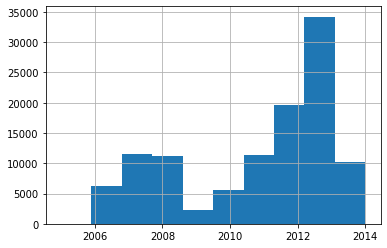

In [205]:
# The histogram below shows the number of loans per year
df_new['Listing_Creation_Year'].hist()

> The histogram above is showing loans per year by creation date.  It appears most of the Prosper loans were created in between 2012 and 2014.  The least amount of loans were created in 2009.

## Graph-5

[Defaulted Loans per Year Histogram](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

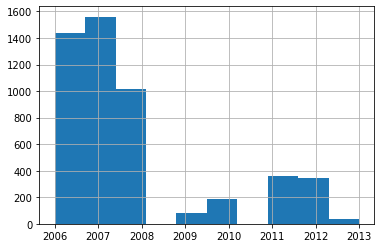

In [206]:
# This histogram below shows the number of defaulted loans per year, 
df_defaulted = df_new.query('LoanStatus == "Defaulted"')
df_defaulted['Listing_Creation_Year'].hist() 


> The histogram above shows most of the defaulted loans created were in the years between 2006 and 2008. 

## Graph-6

[Top 10 Occupations Defaulted Loans Histogram](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

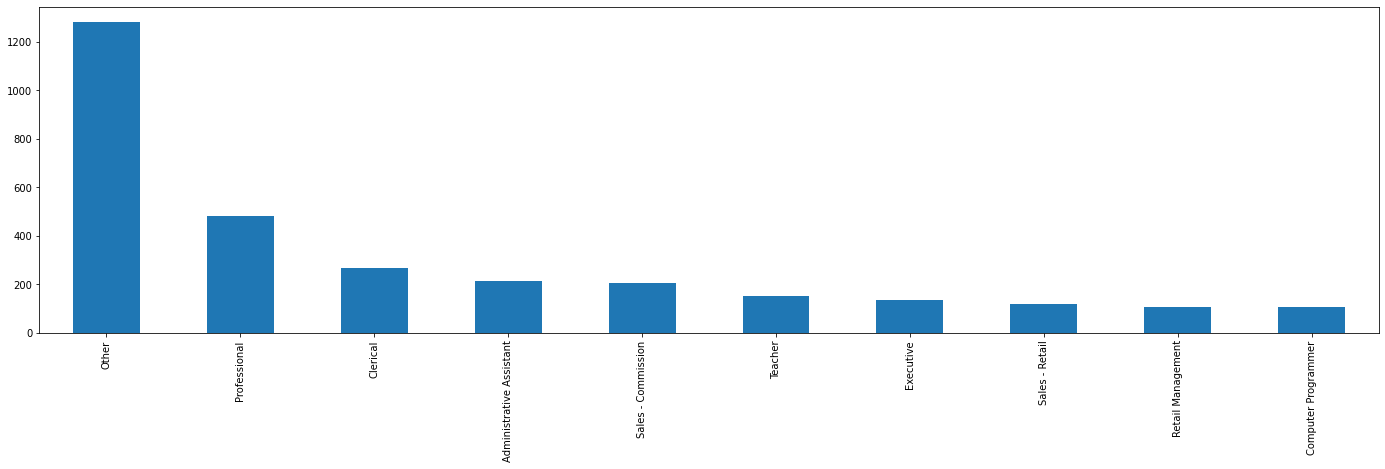

In [207]:
# Value counts for the Listing Category on defaulted loan
df_defaulted['Occupation'].value_counts().nlargest(10).plot(kind='bar', figsize=(24,6))



> The 'Other' category is the most popular occupation for defaulted loans. 

## Graph-7

[Top 10 Loan Categories Defaulted Loans Histogram](#Introduction) <a Introduction ="Introduction"> </a>

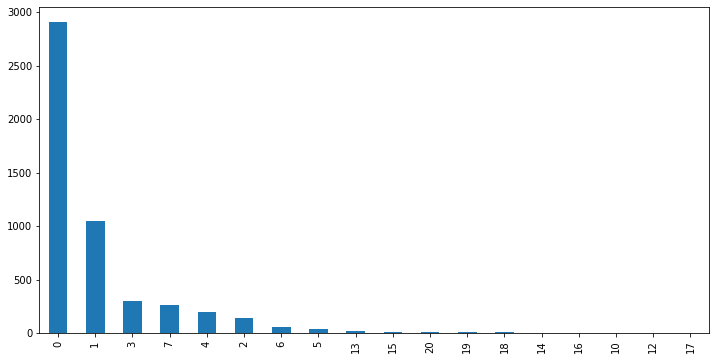

In [208]:
# A bar chart of the defaulted loan listing category to see which loan type was most popular
df_defaulted['Listing_Category'].value_counts().plot(kind='bar',figsize=(12,6));

> Here you can see  the most common loan category for defaulted loans is "Not Available".

>Listing Category Key: 
> 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [209]:
# I used groupby to look at the defaulted loan listings per state
state_df_defaulted = df_defaulted.groupby("BorrowerState")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
state_df_defaulted

,BorrowerState,count
4,CA,732
10,GA,343
43,TX,342
14,IL,337
9,FL,222
22,MI,199
24,MO,193
47,WA,158
35,OH,151
1,AL,122


## Graph-8

[Defaulted Loans by State Histogram](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

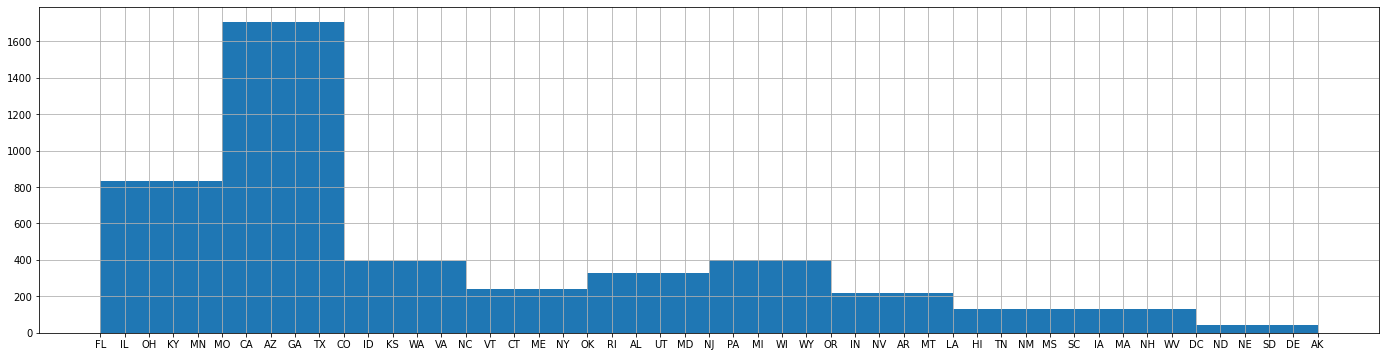

In [210]:
df_defaulted['BorrowerState'].hist(figsize=(24,6))

> The histogram above shows me that I could look at the default rates by state to see which states had higher default rates.  At a glance, Missouri and Georgia seem to have higher default rates than some other states. We could definitely explore this aspect in more depth.

In [211]:
# The max term for the loans are 60 months, or 5 years.  
# The term for defaulted loans isn't much less than the average term for all of the loans.

df_defaulted['Term'].mean()

36.841769629334394

In [212]:
# Default rate for California
df_defaulted.query('BorrowerState == "CA"').BorrowerState.count()/df_new.query('BorrowerState == "CA"').BorrowerState.count()

0.0505524861878453

In [213]:
# Average default rate for all loans
df_new.query('LoanStatus == "Defaulted"').LoanStatus.count()/df_new['LoanStatus'].count()

0.044708167392795733

In [214]:
# Let's look at the default rate for Georgia
df_defaulted.query('BorrowerState == "GA"').BorrowerState.count()/df_new.query('BorrowerState == "GA"').BorrowerState.count()

0.06936299292214358

In [215]:
# Let's look at the default rate for Texas
df_defaulted.query('BorrowerState == "TX"').BorrowerState.count()/df_new.query('BorrowerState == "TX"').BorrowerState.count()

0.050809686525033426

In [216]:
# Let's look at the default rate for Missouri
df_defaulted.query('BorrowerState == "MO"').BorrowerState.count()/df_new.query('BorrowerState == "MO"').BorrowerState.count()

0.07477721813250678

In [217]:
# Let's look at the default rate for Colorado
df_defaulted.query('BorrowerState == "CO"').BorrowerState.count()/df_new.query('BorrowerState == "CO"').BorrowerState.count()

0.033640552995391704

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The occupations listed as 'Other' and loans in the category of 'Not Available' had higher rates of default. 

> Missouri and Georgia seemed to have higher default rates than other states.  Where was this company located?  It looks like there were a lack of standards in some of the loan requirements contributing to higher default rates. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It appears most of the Prosper loans were created in between 2012 and 2014.  The least amount of loans were created in 2009. The histogram above shows most of the defaulted loans created were in the years between 2006 and 2008. 

> The average loan length was 40.77 and the average loan length for defaulted loans was 36.84.  This difference didn't seem significant to me overall, as something which might predict a default on a loan.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> 

In [218]:
# https://www.kaggle.com/xdurana/multivariate-analysis-and-correlation-matrix
# Create a table to run a correlation matrix analysis
# Create a list to grab column names
list(df_new)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'Listing_Category',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage

In [219]:
# Creating a new Dataframe to run the correlation matrix on
matrix_df = df_new[['ListingNumber',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'Listing_Category',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanCurrentDaysDelinquent',
 'LoanFirstDefaultedCycleNumber',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginalAmount',
 'MemberKey',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount',
 'Investors',
 'Listing_Creation_Year']]


In [220]:
# Checking to see if the code was successful
matrix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        112239 non-null  int64  
 1   Term                                 112239 non-null  int64  
 2   BorrowerAPR                          112214 non-null  float64
 3   BorrowerRate                         112239 non-null  float64
 4   LenderYield                          112239 non-null  float64
 5   EstimatedEffectiveYield              83155 non-null   float64
 6   EstimatedLoss                        83155 non-null   float64
 7   EstimatedReturn                      83155 non-null   float64
 8   ProsperRating (numeric)              83155 non-null   float64
 9   ProsperScore                         83155 non-null   float64
 10  Listing_Category                     112239 non-null  int64  
 11  EmploymentSta

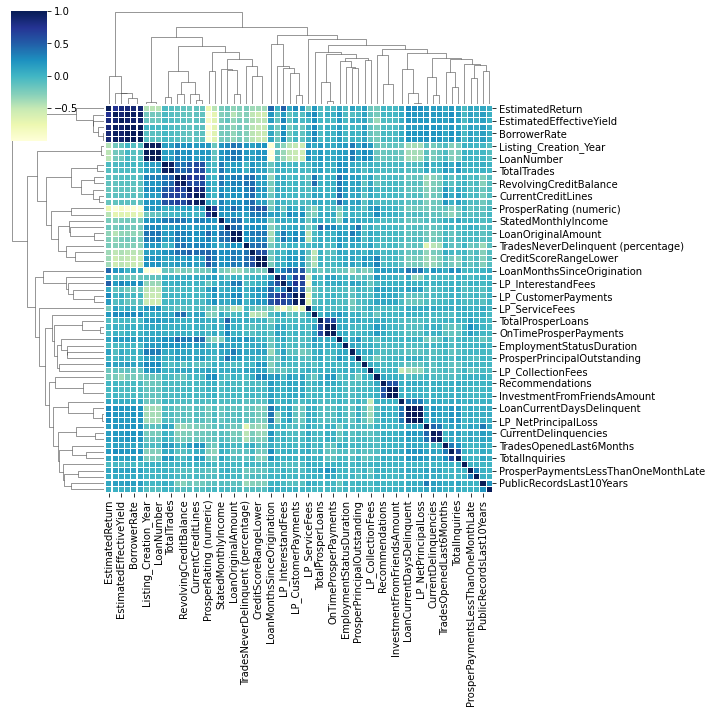

In [226]:
# correlation matrix
corrmat = matrix_df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.2);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

AttributeError: 'QuadMesh' object has no property 'xticklables'

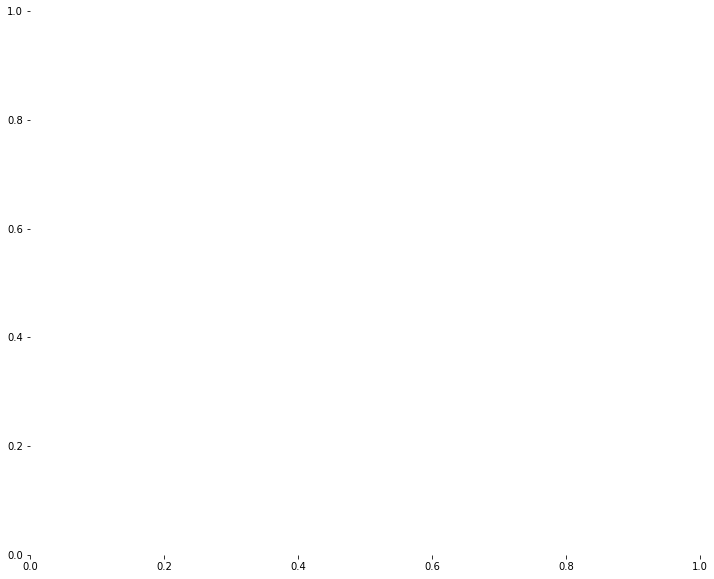

In [225]:
# LP_NetPrincipalLoss Correlation Matrix
k = 62 # of variables for heatmap
cols = corrmat.nlargest(k, 'LP_NetPrincipalLoss')['LP_NetPrincipalLoss'].index
cm = np.corrcoef(matrix_df[cols].values.T)
f, ax=plt.subplots(figsize=(12,10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths= 0.1, yticklabels=cols.values, xticklables=cols.values)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!